In [ ]:
!nvidia-smi

Wed Apr 20 11:42:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-04-20 11:43:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-04-20 11:43:02 (79.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-04-20 11:43:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 173.194.197.128, 173.194.74.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   218MB/s    in 0.7s    

2022-04-20 11:43:06 (218 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import zipfile 

def unzip_data(filename):
  zip_ref = zipfile.ZipFile(filename, 'r')
  zip_ref.extractall(),
  zip_ref.close()

In [ ]:
unzip_data('10_food_classes_10_percent.zip')

In [ ]:
import os 

def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dir_path}.")

In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in 10_food_classes_10_percent.
There are 10 directories and 0 images in 10_food_classes_10_percent.
There are 0 directories and 250 images in 10_food_classes_10_percent.
There are 0 directories and 250 images in 10_food_classes_10_percent.
There are 0 directories and 250 images in 10_food_classes_10_percent.
There are 0 directories and 250 images in 10_food_classes_10_percent.
There are 0 directories and 250 images in 10_food_classes_10_percent.
There are 0 directories and 250 images in 10_food_classes_10_percent.
There are 0 directories and 250 images in 10_food_classes_10_percent.
There are 0 directories and 250 images in 10_food_classes_10_percent.
There are 0 directories and 250 images in 10_food_classes_10_percent.
There are 0 directories and 250 images in 10_food_classes_10_percent.
There are 10 directories and 0 images in 10_food_classes_10_percent.
There are 0 directories and 75 images in 10_food_classes_10_percent.
There are 0 directories a

In [ ]:
train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

In [ ]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.utils.image_dataset_from_directory(directory = train_dir,
                                                                    image_size = IMG_SIZE,
                                                                    label_mode = 'categorical',
                                                                    batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode = 'categorical',
                                                                batch_size = BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[ 88.31633    65.31633    49.316326 ]
   [ 87.2602     63.188774   46.260204 ]
   [ 88.57653    62.357143   44.790817 ]
   ...
   [ 13.826533   12.964274   10.964274 ]
   [ 12.341782    8.341782    5.3417816]
   [ 12.831804    8.54609     4.188947 ]]

  [[ 85.42347    59.352043   46.4949   ]
   [ 93.13265    65.13265    51.27551  ]
   [ 92.42857    64.88776    48.27041  ]
   ...
   [ 11.892715   10.066247    6.734554 ]
   [ 10.923469    6.9234686   3.9234686]
   [ 15.454224   12.454224    7.4542236]]

  [[ 73.44388    46.44388    37.015305 ]
   [ 91.40306    64.188774   52.97449  ]
   [ 90.85715    62.47449    49.617348 ]
   ...
   [ 16.719336   12.505073    9.505073 ]
   [ 10.882671    7.6683855   3.0969565]
   [ 16.515398   13.515398    8.515398 ]]

  ...

  [[ 38.617558   44.046146   37.617558 ]
   [ 23.964315   28.964315   22.750021 ]
   [ 24.61734    27.122461   21.954088 ]
   ...
   [  2.          2.          2.       ]
   [  2.          2.          2.       ]
   [ 

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = 'input_layer')

#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

x = base_model(inputs)
print(f"shape after passing inputs through base model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name = 'Global_average_pooling_layer')(x)
print(f"Shape after GlobalAveragePooling2D {x.shape}")

outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

model_0 = tf.keras.Model(inputs, outputs)


model_0.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_10_percent = model_0.fit(train_data_10_percent,
            batch_size = BATCH_SIZE,
            epochs = 5,
            validation_data = test_data,
            steps_per_epoch = len(train_data_10_percent),
            validation_steps = 0.25 * len(test_data),
            callbacks = [create_tensorboard_callback('transfer_learning', '10_percent_feature_extraction')])

16719872/16705208 [==============================] - 0s 0us/step
shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20220420-114316
Epoch 1/5
24/24 [==============================] - 28s 457ms/step - loss: 1.9925 - accuracy: 0.3440 - val_loss: 1.4220 - val_accuracy: 0.6766
Epoch 2/5
24/24 [==============================] - 7s 277ms/step - loss: 1.1926 - accuracy: 0.7440 - val_loss: 0.9231 - val_accuracy: 0.8047
Epoch 3/5
24/24 [==============================] - 7s 272ms/step - loss: 0.8578 - accuracy: 0.8093 - val_loss: 0.7610 - val_accuracy: 0.8156
Epoch 4/5
24/24 [==============================] - 7s 272ms/step - loss: 0.6955 - accuracy: 0.8347 - val_loss: 0.6637 - val_accuracy: 0.8328
Epoch 5/5
24/24 [==============================] - 9s 361ms/step - loss: 0.5929 - accuracy: 0.8627 - val_loss: 0.5951 - val_accuracy: 0.8469


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 11s 138ms/step - loss: 0.6116 - accuracy: 0.8352


[0.6115684509277344, 0.8352000117301941]

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


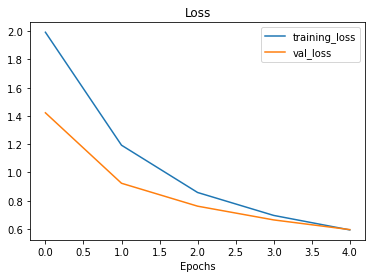

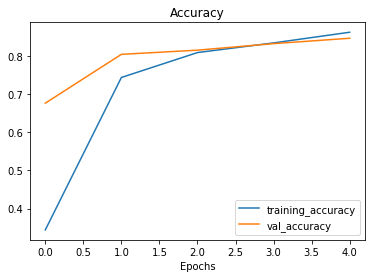

In [ ]:
plot_loss_curves(history_10_percent)

In [ ]:
input_shape = (1, 4, 4, 3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor: \n {input_tensor} \n")

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D Global average pooled random tensor: \n {global_average_pooled_tensor} \n")

Random input tensor: 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 

2D Global average pooled random tensor: 
 [[-0.09368646 -0.45840448 -0.2885598 ]] 



In [ ]:
tf.reduce_mean(input_tensor, axis = [1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [ ]:
#Same thing as above but this time use globalmaxpool2d

In [ ]:
tf.keras.layers.GlobalMaxPool2D()(input_tensor)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2022-04-20 11:44:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.148.128, 74.125.129.128, 108.177.112.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.148.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   140MB/s    in 0.9s    

2022-04-20 11:44:53 (140 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
unzip_data("10_food_classes_1_percent.zip")

In [ ]:
train_dir_1_percent = "/content/10_food_classes_1_percent/train"
test_dir = "/content/10_food_classes_1_percent/test"

In [ ]:
walk_through_dir("/content/10_food_classes_1_percent")

There are 2 directories and 0 images in /content/10_food_classes_1_percent.
There are 10 directories and 0 images in /content/10_food_classes_1_percent.
There are 0 directories and 250 images in /content/10_food_classes_1_percent.
There are 0 directories and 250 images in /content/10_food_classes_1_percent.
There are 0 directories and 250 images in /content/10_food_classes_1_percent.
There are 0 directories and 250 images in /content/10_food_classes_1_percent.
There are 0 directories and 250 images in /content/10_food_classes_1_percent.
There are 0 directories and 250 images in /content/10_food_classes_1_percent.
There are 0 directories and 250 images in /content/10_food_classes_1_percent.
There are 0 directories and 250 images in /content/10_food_classes_1_percent.
There are 0 directories and 250 images in /content/10_food_classes_1_percent.
There are 0 directories and 250 images in /content/10_food_classes_1_percent.
There are 10 directories and 0 images in /content/10_food_classes_1

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode = 'categorical',
                                                                           image_size = IMG_SIZE,
                                                                           batch_size = BATCH_SIZE)


test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                          label_mode = 'categorical',
                                                                          image_size = IMG_SIZE,
                                                                          batch_size = BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (224, 224, 3)),
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
], name = "data_augmentation")

/content/10_food_classes_1_percent/train/grilled_salmon/1382243.jpg


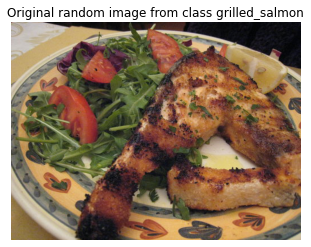

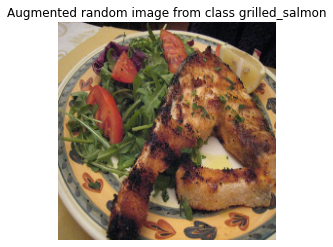

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "/content/10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
print(random_image_path)

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.axis(False)
plt.title(f"Original random image from class {target_class}")

img = tf.image.resize(img, size = (224, 224))
augmented_img = tf.squeeze(data_augmentation(tf.expand_dims(img, axis = 0)))
plt.figure()
plt.title(f"Augmented random image from class {target_class}")
plt.axis(False)
plt.imshow(augmented_img/255.)

In [ ]:
os.listdir(target_dir)

['2957065.jpg',
 '940556.jpg',
 '1382243.jpg',
 '2521945.jpg',
 '2947214.jpg',
 '3031507.jpg',
 '1417472.jpg']

In [ ]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = input_shape, name = "input_layer")

x = data_augmentation(inputs)

x = base_model(x, training = False)

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_1_percent = model_1.fit(train_data_1_percent,
                                epochs = 5,
                                steps_per_epoch = len(train_data_1_percent),
                                validation_data = test_data,
                                validation_steps = int(0.25 * len(test_data)),
                                callbacks = [create_tensorboard_callback(dir_name = "/content/transfer_learning",
                                                                         experiment_name = "1_percent_data_aug")])

Saving TensorBoard log files to: /content/transfer_learning/1_percent_data_aug/20220420-114459
Epoch 1/5
3/3 [==============================] - 15s 3s/step - loss: 2.4446 - accuracy: 0.1143 - val_loss: 2.2323 - val_accuracy: 0.1809
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.1609 - accuracy: 0.2429 - val_loss: 2.1344 - val_accuracy: 0.2303
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 1.9632 - accuracy: 0.4000 - val_loss: 2.0314 - val_accuracy: 0.2944
Epoch 4/5
3/3 [==============================] - 7s 3s/step - loss: 1.8332 - accuracy: 0.4714 - val_loss: 1.9267 - val_accuracy: 0.3717
Epoch 5/5
3/3 [==============================] - 7s 3s/step - loss: 1.6975 - accuracy: 0.6429 - val_loss: 1.8304 - val_accuracy: 0.4260


In [ ]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 11s 134ms/step - loss: 1.8408 - accuracy: 0.4116


[1.84078848361969, 0.4115999937057495]

In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

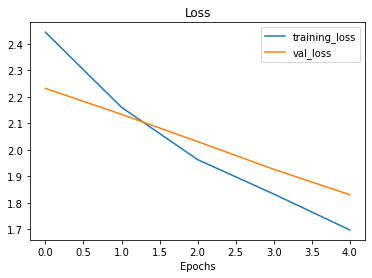

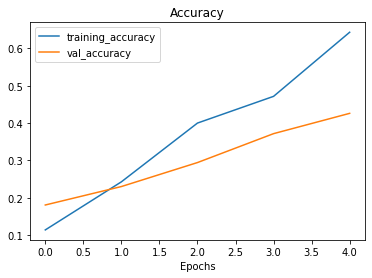

In [ ]:
plot_loss_curves(history_1_percent)

In [ ]:
train_dir_10_percent = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = 'categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size = IMG_SIZE,
                                                                label_mode = 'categorical')


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
  layers.Input(shape = input_shape),
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2)
  #preprocessing.Rescaling(1./255)
], name = 'data_augmentation')

data_augmentation.summary()

Model: "data_augmentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_height_1 (RandomHeig  (None, 224, 224, 3)      0         
 ht)                                                             
                                                                 
 random_width_1 (RandomWidth  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 random_zoom_1 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                 

In [ ]:
input_shape

(224, 224, 3)

In [ ]:
checkpoint_path = "10_percent_model_checkpoints_weights/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath= checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = True,
                                                         save_freq = 'epoch',
                                                         verbose = 1)

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = input_shape, name = "input_layer")

x = data_augmentation(inputs)
x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_2D")(x)

outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = "output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)


initial_epochs = 5

history_10_percent_data_aug = model_2.fit(train_data_10_percent,
            epochs = initial_epochs,
            steps_per_epoch = len(train_data_10_percent),
            validation_data = test_data,
            validation_steps = int(0.25 * len(test_data)),
            callbacks = [checkpoint_callback,
                         create_tensorboard_callback(dir_name = 'transfer_learning', experiment_name = '10_percent_data_aug')])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20220420-114610
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0036 - accuracy: 0.3413
Epoch 1: val_loss improved from inf to 1.51354, saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 40s 940ms/step - loss: 2.0036 - accuracy: 0.3413 - val_loss: 1.5135 - val_accuracy: 0.6332
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3605 - accuracy: 0.6653
Epoch 2: val_loss improved from 1.51354 to 1.06592, saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 18s 714ms/step - loss: 1.3605 - accuracy: 0.6653 - val_loss: 1.0659 - val_accuracy: 0.7533
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0627 - accuracy: 0.7493
Epoch 3: val_loss improved from 1.06592 to 0.86825, saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [====

In [ ]:
results_10_percent_aug = model_2.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 0.6915 - accuracy: 0.8124


In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_2D (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

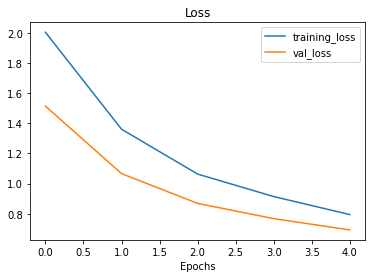

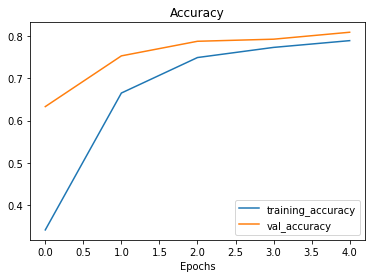

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 0.6915 - accuracy: 0.8124


In [ ]:
import numpy as np
np.isclose(loaded_weights_model_results, results_10_percent_aug)


array([ True,  True])

In [ ]:
model_2.layers

In [ ]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f841b803b50> True
<keras.engine.sequential.Sequential object at 0x7f832e887f90> True
<keras.engine.functional.Functional object at 0x7f832f186b10> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f832e8c4ad0> True
<keras.layers.core.dense.Dense object at 0x7f849adb6bd0> True


In [ ]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_5 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False


model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = ['accuracy']
)

In [ ]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_5 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
print(len(model_2.trainable_variables))

12


In [ ]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_percent_aug = model_2.fit(train_data_10_percent,
                                          epochs = fine_tune_epochs,
                                          validation_data = test_data,
                                          validation_steps = int(0.25 * len(test_data)),
                                          initial_epoch = history_10_percent_data_aug.epoch[-1],
                                          callbacks = [create_tensorboard_callback(dir_name = 'transfer_learning',
                                                                                   experiment_name = '10_percent_fine_tune_last_10')])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20220420-114819
Epoch 5/10
24/24 [==============================] - 28s 746ms/step - loss: 0.6816 - accuracy: 0.8133 - val_loss: 0.5280 - val_accuracy: 0.8224
Epoch 6/10
24/24 [==============================] - 13s 544ms/step - loss: 0.5720 - accuracy: 0.8213 - val_loss: 0.4905 - val_accuracy: 0.8339
Epoch 7/10
24/24 [==============================] - 13s 536ms/step - loss: 0.4878 - accuracy: 0.8560 - val_loss: 0.4873 - val_accuracy: 0.8339
Epoch 8/10
24/24 [==============================] - 14s 582ms/step - loss: 0.4424 - accuracy: 0.8587 - val_loss: 0.4921 - val_accuracy: 0.8273
Epoch 9/10
24/24 [==============================] - 14s 559ms/step - loss: 0.4062 - accuracy: 0.8720 - val_loss: 0.4576 - val_accuracy: 0.8470
Epoch 10/10
24/24 [==============================] - 13s 486ms/step - loss: 0.3697 - accuracy: 0.8907 - val_loss: 0.4191 - val_accuracy: 0.8503


In [ ]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 11s 134ms/step - loss: 0.4965 - accuracy: 0.8308


In [ ]:
results_10_percent_aug

[0.6915298104286194, 0.8123999834060669]

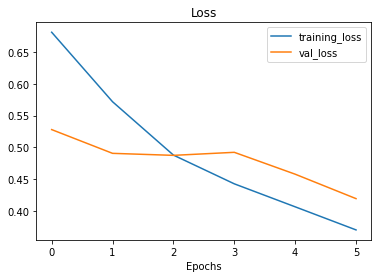

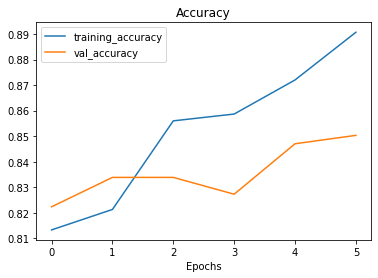

In [ ]:
plot_loss_curves(history_fine_10_percent_aug)

In [ ]:
def compare_histories(original_history, new_history, initial_epochs = 5):
  acc = original_history.history['accuracy']
  loss = original_history.history['loss']

  val_acc = original_history.history['val_accuracy']
  val_loss = original_history.history['val_loss']

  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']

  total_val_acc = val_acc + new_history.history['val_accuracy']
  total_val_loss = val_loss + new_history.history['val_loss']

  plt.figure(figsize = (8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label = 'training accuracy')
  plt.plot(total_val_acc, label = 'Val accuracy')
  plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label = "Start fine tuning")
  plt.legend(loc = 'lower right')
  plt.title('Trainig and Val accuracy')


  plt.figure(figsize = (8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label = "Training Loss")
  plt.plot(total_val_loss, label = "Val Loss")
  plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label = 'Start Fine Tuning')
  plt.legend(loc = 'upper right')
  plt.title("Training and Val loss")

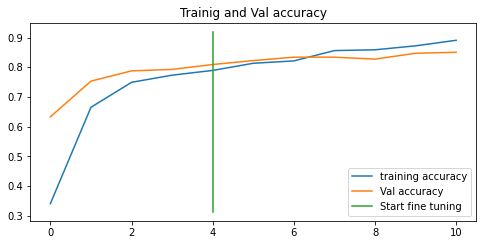

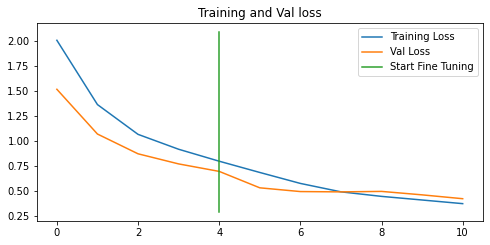

In [ ]:
compare_histories(history_10_percent_data_aug, history_fine_10_percent_aug)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-04-20 11:50:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 142.251.120.128, 74.125.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   164MB/s    in 3.0s    

2022-04-20 11:50:42 (164 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
unzip_data("10_food_classes_all_data.zip")


In [ ]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 0 directories and 250 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data.
There are 0 directories and 750 images in 10_food_classes_all_data.
There are 0 directories and 750 images in 10_food_cl

In [ ]:
train_dir_all_data = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

In [ ]:
train_data_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                      label_mode = 'categorical',
                                                                      image_size = IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = 'categorical',
                                                                image_size = IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 0.6915 - accuracy: 0.8124


[0.6915298104286194, 0.8123999834060669]

In [ ]:
results_10_percent_aug

[0.6915298104286194, 0.8123999834060669]

In [ ]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_2D True
4 output_layer True


In [ ]:
model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics = ['accuracy'])

In [ ]:
fine_tune_epochs = initial_epochs + 5

history_ine_10_classes_full = model_2.fit(train_data_full,
                                          epochs = fine_tune_epochs,
                                          validation_data = test_data,
                                          validation_steps = int(0.25 * len(test_data)),
                                          initial_epoch = history_10_percent_data_aug.epoch[-1],
                                          callbacks = [create_tensorboard_callback(dir_name = 'transfer_learning', 
                                                                                   experiment_name = "full_10_classes_fine_tune")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune/20220420-121041
Epoch 5/10
235/235 [==============================] - 94s 355ms/step - loss: 0.7400 - accuracy: 0.7657 - val_loss: 0.3866 - val_accuracy: 0.8882
Epoch 6/10
235/235 [==============================] - 73s 309ms/step - loss: 0.5937 - accuracy: 0.8120 - val_loss: 0.3161 - val_accuracy: 0.9013
Epoch 7/10
235/235 [==============================] - 68s 289ms/step - loss: 0.5189 - accuracy: 0.8344 - val_loss: 0.3341 - val_accuracy: 0.8964
Epoch 8/10
235/235 [==============================] - 64s 268ms/step - loss: 0.4885 - accuracy: 0.8421 - val_loss: 0.3049 - val_accuracy: 0.9095
Epoch 9/10
235/235 [==============================] - 68s 290ms/step - loss: 0.4575 - accuracy: 0.8521 - val_loss: 0.3214 - val_accuracy: 0.8964
Epoch 10/10
235/235 [==============================] - 62s 260ms/step - loss: 0.4215 - accuracy: 0.8623 - val_loss: 0.3197 - val_accuracy: 0.8964


In [ ]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 12s 142ms/step - loss: 0.3201 - accuracy: 0.8940


[0.3200977146625519, 0.8939999938011169]

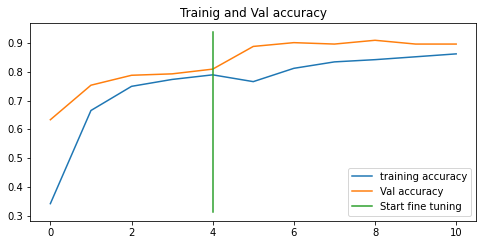

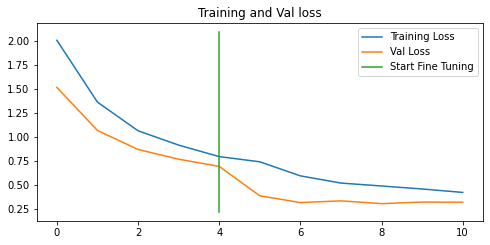

In [ ]:
compare_histories(original_history = history_10_percent_data_aug, new_history = history_ine_10_classes_full)